In [ ]:
cd matlab
pwd

# The Fast Fourier Transform

## Scope and Background Reading

This session introduces the fast fourier transform (FFT) which is one of the most widely used numerical algorithms in the world. It exploits some features of the symmetry of the computation of the DFT to reduce the complexity to something that takes order $N^2$ ($O(N^2)$) complex operations to something that takes order $N log N$ ($O(N \log N)$) operations. 

The FFT is to be found in all manner of signal and image processing algorithms, and because it is more efficient than the DFT, you will find it exploited in hundreds of signal processing applications.

As one example, it turns out that the computation of the convolution of two long DT sequences is more efficient if the FFT of the two signals is taken, the product of the frequency spectra is computed the Inverse DFT of the result is computed.

In this presentation, we will not go through the mathematical development of the FFT, please read section 10.6 of the textbook if you want the details. Here we will concentrate on the benefits to be gained by using the FFT and give some examples of its use in MATLAB.

The material in this presentation and notes is based on Chapter 10 of [Steven T. Karris, Signals and Systems: with Matlab Computation and Simulink Modelling, 5th Edition](http://site.ebrary.com/lib/swansea/docDetail.action?docID=10547416) from the **Required Reading List**.

## Agenda

* The inefficiency of the DFT

* The FFT - a sketch of its development

* FFT v DFT

* Two examples

## The inefficiency of the DFT

Consider a signal whose highest frequency is 18 kHz, the sampling frequency is 50 kHz, and 1024 samples are taken, i.e., $N=1024$. 

The time required to compute the entire DFT would be:

$$t = \frac{1024\,\mathrm{samples}}{50\times 10^3\,\mathrm{samples\ per\ second}} = 20.48\,\mathrm{ms}$$

To compute the number of operations required to complete this task, let us expand the N-point DFT defined as:

$$X[m] = \sum_{n=0}^{N-1} x[n] W_N^{mn}$$

Then
$$\begin{eqnarray*}
  X[0] &=& x[0]W_N^0 + x[1]W_N^0 + x[1]W_N^0 +  \cdots  + x[N - 1]W_N^0 \hfill \\
  X[1] &=& x[0]W_N^0 + x[1]W_N^1 + x[1]W_N^2 +  \cdots  + x[N - 1]W_N^{N - 1} \hfill \\
  X[2] &=& x[0]W_N^0 + x[1]W_N^2 + x[1]W_N^4 +  \cdots  + x[N - 1]W_N^{2(N - 1)} \hfill \\
  \hfil &\cdots&  \hfill \\
  X[N - 1] &=& x[0]W_N^0 + x[1]W_N^{N - 1} + x[1]W_N^{2(N - 1)} +  \cdots  + x[N - 1]W_N^{{{(N - 1)}^2}} \hfill \\ 
\end{eqnarray*}$$

* It is worth remembering that 
$$W_N^0 = e^{-j\frac{2\pi}{N}(0)} = 1.$$

* Since $W_N^i$ is a complex number, the computation of any frequency component $X[k]$ requires $N$ complex multiplications and $N$ complex additions

* $2N$ complex arithmetic operations are required to compute any frequency component of $X[k].$<sup>1</sup> 

* If we assume that $x[n]$ is real, then only $N/2$ of the $|X[m]|$ components are unique. 

* Therefore we would require $2N\times N/2 = N^2$ complex operations to compute the entire frequency spectrum.<sup>2</sup>

* For our example, the $N=1024$-point DFT, would require $1024^2 = 1,048,576$ complex operations

* These would have to be completed in 20.48 ms. 

* This may be possible with modern computing hardware, perhaps even in a mobile phone, but it seems impractical.

* Fortunately, many of the $W_N$ terms in the computation are unity ($=1$). 

* Moreover, because the $W_N^i$ points are equally spaced points on the unit circle; 

* Because $N$ is a power of 2 the points on the upper-half plane (range $0 < \theta < \pi$ are the mirror image of the points on the lower half plane range $\pi < \theta < 2\pi$;

* Thus, there is a great deal of symmetry in the computation that can be exploited to simplify the computation and reduce the number of operations considerably to a much more manageable $N \log_2 N$ operations<sup>3</sup>.

This is possible with the algorithm called the [FTT](https://en.wikipedia.org/wiki/Fast_Fourier_transform) (fast Fourier transform) that was originally developed by [James Cooley](https://en.wikipedia.org/wiki/James_Cooley) and [John Tukey](https://en.wikipedia.org/wiki/John_Tukey) and considerably refined since.

## The Fast Fourier Transform (FFT)

The FFT is very well documented, including in the text book, so we will only sketch its development and present its main result.

Much of the development follows from the properties of the rotating vector.<sup>4</sup>

$$W_N=e^{-\frac{j2\pi}{N}}$$

which results in some simplifications and mathematical short-cuts when $N$ is a power of 2.

The most useful properties are:

$$\begin{eqnarray*}W_N^N &=& e^{-j\frac{2\pi}{N}N} = e^{-j2\pi} = 1.\\
  W_N^{N/2} &=&  e^{-j\frac{2\pi}{N}\frac{N}{2}} = e^{-j\pi} = -1.\\
  W_N^{N/4} &=&  e^{-j\frac{2\pi}{N}\frac{N}{4}} = e^{-j\pi/2} = -j.\\
  W_N^{3N/4} &=&  e^{-j\frac{2\pi}{N}\frac{3N}{4}} = e^{-j3\pi/2} = j.\\
  W_N^{kN} &=&  e^{-j\frac{2\pi}{N}kN} = e^{-j2\pi} = 1,\,k=0,1,2,\ldots\\
  W_N^{kN+r} &=&  e^{-j\frac{2\pi}{N}kN}e^{-j\frac{2\pi}{N}r} = 1.W_N^r=W_N^r.\\
  W_{2N}^{k} &=&  e^{-j\frac{2\pi}{2N}k} = e^{-j\frac{2\pi}{N}\frac{k}{2}} = W_N^{k/2}.
\end{eqnarray*}$$

Representing

$$\begin{eqnarray*}
  X[0] &=& x[0]W_N^0 + x[1]W_N^0 + x[1]W_N^0 +  \cdots  + x[N - 1]W_N^0 \hfill \\
  X[1] &=& x[0]W_N^0 + x[1]W_N^1 + x[1]W_N^2 +  \cdots  + x[N - 1]W_N^{N - 1} \hfill \\
  X[2] &=& x[0]W_N^0 + x[1]W_N^2 + x[1]W_N^4 +  \cdots  + x[N - 1]W_N^{2(N - 1)} \hfill \\
  \hfil &\cdots&  \hfill \\
  X[N - 1] &=& x[0]W_N^0 + x[1]W_N^{N - 1} + x[1]W_N^{2(N - 1)} +  \cdots  + x[N - 1]W_N^{{{(N - 1)}^2}} \hfill \\ 
\end{eqnarray*}$$



in matrix form:
$$
\left[ {\begin{array}{*{20}{c}}
{X[0]}\\
{X[1]}\\
{X[2]}\\
 \vdots \\
{X[N - 1]}\end{array}} \right] = \left[ {\begin{array}{*{20}{c}}
{W_N^0}&{W_N^0}&{W_N^0}&\cdots&{W_N^0}\\
{W_N^0}&{W_N^1}&{W_N^2}&\cdots&{W_N^{N - 1}}\\
{W_N^0}&{W_N^2}&{W_N^4}&\cdots&{W_N^{2(N - 1)}}\\
\cdots&\cdots&\cdots&\cdots&\cdots\\
{W_N^0}&{W_N^{N - 1}}&{W_N^{2(N - 1)}}&\cdots&{W_N^{{{(N - 1)}^2}}}\\
\end{array}} \right]\left[ {\begin{array}{*{20}{c}}
{x[0]}\\
{x[1]}\\
{x[2]}\\
 \vdots \\
{x[N - 1]}
\end{array}} \right].$$

This is a complex [Vandemonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) and it is more compactly expressed as:

$$\mathbf{X}[m] = \mathbf{W_N} \mathbf{x}[n]$$

The algorithm developed by Cooley and Tukey is based on *matrix decomposition* methods, where the matrix $\mathbf{W_N}$ is factored into $L$ smaller matrices, that is:
$$\mathbf{W_N} = \mathbf{W_1} \mathbf{W_2} \mathbf{W_3} \cdots \mathbf{W_L}$$
where $L$ is chosen as $L = \log_2N$ or $N=2^L$.

Each row of the matrices on the right side of the decomposition, contains only two, non-zero terms, unity and $W_N^k$. Then the vector
$$\mathbf{X}[m] = \mathbf{W_1} \mathbf{W_2} \mathbf{W_3} \cdots \mathbf{W_L} \mathbf{x}[n].$$

The FFT computation starts with matrix $\mathbf{W}_L$. It operates on $\mathbf{x}[n]$ producing a row vector, and each component of the row vector is obtained by one multiplication and one addition. This is because there are only two non-zero elements on a given row, and one of those elements is unity. Since there are $N$ components of $\mathbf{x}[n]$, there will be $N$ complex multiplications and $N$ complex additions. 

This new vector is then operated on by the $\mathbf{W}_{L-1}$ matrix, then on $\mathbf{W}_{L-1}$ and so on, until the entire operation is completed.

It appears that the entire operation would require $NL= N\log_2N$ complex additions and also $N\log_2N$ complex additions. 

However, since $W_N^0 = 1$, $W_N^{N/2}=-1$, and other simplifications, it is estimated that only about half of these, that is, $N\log_2 N$ total arithmetic operations are required by the FFT versus the $N^2$ required by the DFT<sup>5</sup>.

## DFT and FFT Comparisons

Under the assumptions about the relative efficiency of the DFT and FFT we can create a table like that shown below:

|   | DFT | FFT | FFT/DFT |
|---|-----|-----|-----------|
| N | $N^2$ | $N\log_2 N$ | % | 
| 8 | 64    | 24 | 37.5 |
| 16 | 256    | 64 | 25 |
| 32 | 1024    | 160 | 15.6 |
| 64 | 4096    | 384 | 9.4 |
| 128| $16,384$    | 896 | 5.5 |
| 256 | $65,536$    | 2048 | 3.1 |
| 512 | $261,144$    | 4608 | 1.8 |
| 1024 | $1,048,576$    | $10,240$ | 1 |
| 2048 | $4,194,304$    | $22,528$ | 0.5 |

As you can see, the efficiy of the FFT actual gets better as the number of samples go up!


## FFT in MATLAB

The FFT algorithm is implemented, in MATLAB, as the function `fft`. We will conclude by working through Exercises 6 and 7 from section 10.8 of Karris.

### Example 1

Plot the Fourier transform of the rectangular pulse shown below, using the MATLAB `fft` func-tion. Then, use the `ifft` function to verify that the inverse transformation produces the rectangular pulse.

![Example 1](pictures/fft_example1.png)

### FFT Example 1

The rectangular pulse can be produced like so

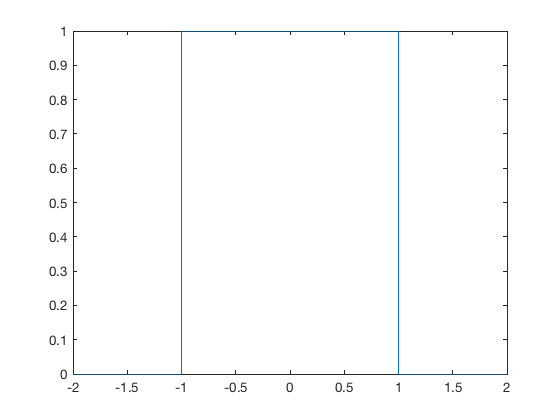

In [10]:
x = [linspace(-2,-1,50) linspace(-1,1,100) linspace(1,2,50)];
y = [linspace(0,0,50) linspace(1,1,100) linspace(0,0,50)];
plot(x,y)

and the FFT is produced as

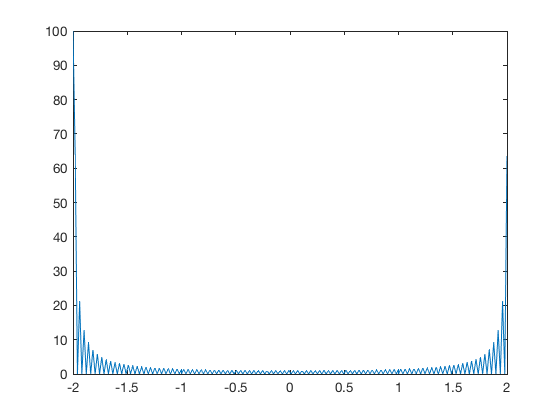

In [11]:
plot(x, abs(fft(y)))

unwind 

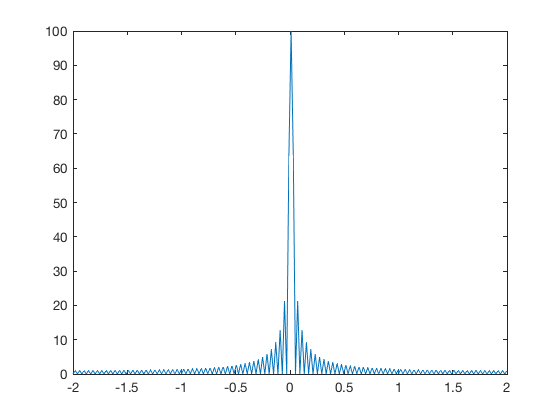

In [12]:
plot(x, abs(fftshift(fft(y))))

The inverse FFT is obtained with

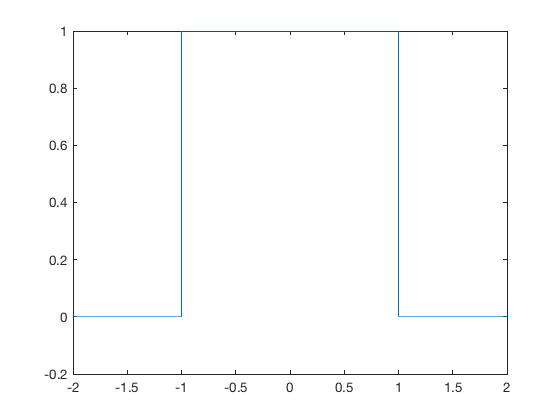

In [13]:
plot(x, ifft(fft(y)))

### Example 2

![Example 2](pictures/fft_example2.png)

### FFT Example 2

The triangular pulse is obtained with

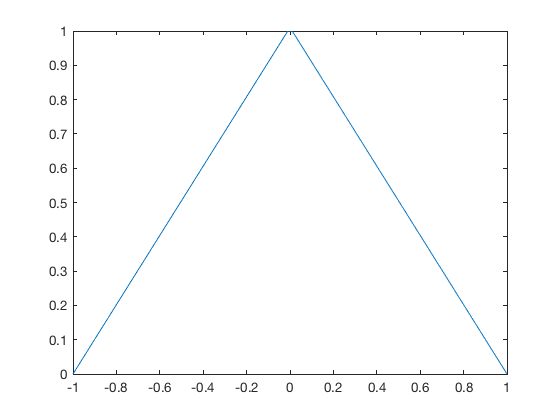

In [14]:
x = linspace(-1,1,100);
y = [linspace(0,1,50) linspace(1,0,50)];
plot(x,y)

and the FFT is obtained with

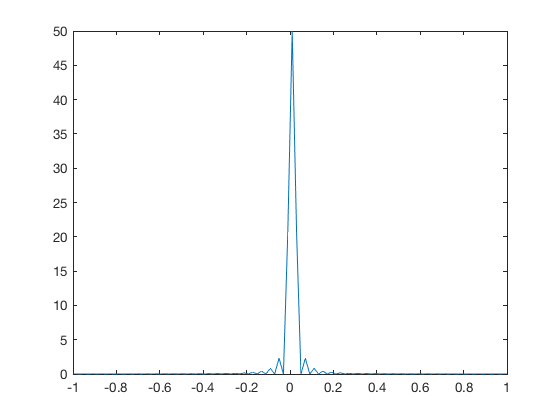

In [15]:
plot(x, abs(fftshift(fft(y))))

The inverse FFT is obtained with

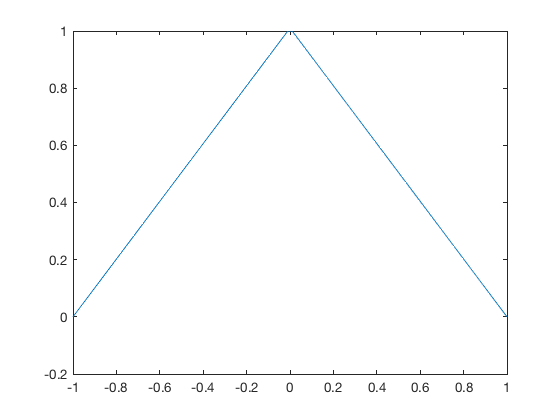

In [16]:
plot(x, ifft(fft(y)))

## Summary

* The inefficiency of the DFT
* The FFT - a sketch of its development
* FFT v DFT
* Two examples

## Homework

Read the rest of Chapter 10 of Karris from page 10.9 and make your own notes on the implementation of the FFT. 

## The End?

* This concludes this module. 
* There is some material that I have not covered, most notably is a significant amount of additional information about **Filter Design** (including the use of Matlab for this) in Chapter 11 of Karris.

### Footnotes

<sup>1</sup>*Note*: addition of two complex numbers $(a + jb) + (c + jd) = (a+b) + j(b + d)$ so requires 2 floating-point additions; multiplication $(a + jb)(c + jd) = (ac - bd)+j(ad + bc)$ requires four floating-point multiplications and two additions. 

In MATLAB, complex numbers are represented internally as two 64 bit floating point operations so each complex operation is expensive both in terms of computing time and working memory space. And the result of an N-point DFT will require twice the memory of the original sequence, assuming that it is stored as floating point real numbers, considerably 16 times the storage is needed if the original sequence is the result of sampling by, say, an 8 bit ADC.

Of course, modern 64 bit mirocprocessers have hardware support for floating point operations and so these operations take a minumum number of machine cycles. Digital Signal Processors and Graphic Processing Units, probably have hardware support for complex arithmetic too. Nonethess, complex arithmetic is an expensive operation, so any simplifications we can make will be valuable.

<sup>2</sup>Even if we do not have a real sequence, we only need to compute the first $N/2$ values of the spectrum because the sequence for $X[k]$ from $N/2 + 1 < k <= N-1$ are complex conjugates, in the reverse order, of the sequence of $X[k]$ for $0 <= k < N/2$. This is easy to prove by looking at the geometry of the unit circle in the z-plane.

<sup>3</sup>If $N=1024$, $N\log_2 N = 1024*10 = 10,240$ complex operations.

<sup>4</sup>The Inverse FFT (IFFT) follows by noting that the rotation vector used in its computation is the complex conjugate
$$W_N^{-1}.$$

<sup>5</sup> Karris goes further in showing how the decomposition used to implement the FFT can be further be understood by considering even and odd decompositions. We do not have time to cover this in this module, but you are invited to read further if you are interested. You'll also find that most text books on Digital Signal Processing will cover the FFT and give more or less understandable presentations of the way the algorithm works.

## Solutions

### Example 1

See script [fft_ex1.m](https://github.com/cpjobling/EG-247-Resources/blob/master/week10/matlab/fft_ex1.m).

### Example 2

See script [fft_ex2.m](https://github.com/cpjobling/EG-247-Resources/blob/master/week10/matlab/fft_ex2.m).